In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os

import sys
sys.path.append('/mnt/disk1/yunseob/Pytorch/SSM/0_modules')
from SSM_utils import Reshape4torch, GenerateLabel
from SSM_DL_training import CNN_Training

# Load Data

In [2]:
data_dir = '/mnt/disk2/data/private_data/SSM/2_Mockup/1_AE_Accel_Data/2_NOISE_GN/-10db'

def GBdataLoad2(data_dir, phase = 'train', data = 'AE'):
    for i in os.listdir(data_dir):
        if 'good' in i and phase in i and data in i:
            G_X = np.load(os.path.join(data_dir, i))
        elif 'bad' in i and phase in i and data in i:
            B_X = np.load(os.path.join(data_dir, i))
            
    def add_ch(img):
        """
        (sample #, height, width,) -> (sample #, height, width, channel)
        """
        return np.expand_dims(img, axis = -1)
    
    G_X, B_X = add_ch(G_X), add_ch(B_X)
    G_X, B_X = Reshape4torch(G_X), Reshape4torch(B_X)

    return G_X, B_X

AE_G_X, AE_B_X = GBdataLoad2(data_dir, phase = 'train', data = 'AE')
print('AE data', AE_G_X.shape, AE_B_X.shape, '\n')

Accel_G_X, Accel_B_X = GBdataLoad2(data_dir, phase = 'train', data = 'accel')
print('Accel data', Accel_G_X.shape, Accel_B_X.shape, '\n')

G_X = np.concatenate((AE_G_X, Accel_G_X), axis = 1)
B_X = np.concatenate((AE_B_X, Accel_B_X), axis = 1)

G_Y, B_Y = GenerateLabel(G_X, 0), GenerateLabel(B_X, 1)

print('GOOD:', G_X.shape, 'BAD', B_X.shape)

GB_X = [G_X, B_X]
GB_Y = [G_Y, B_Y]

AE data (2822, 1, 40, 40) (2510, 1, 40, 40) 

Accel data (2822, 1, 40, 40) (2510, 1, 40, 40) 

GOOD: (2822, 2, 40, 40) BAD (2510, 2, 40, 40)


0 (2822, 2, 40, 40) (2822,)
0 train: (2539, 2, 40, 40) (2539,) valid: (283, 2, 40, 40) (283,)
1 (2510, 2, 40, 40) (2510,)
1 train: (2259, 2, 40, 40) (2259,) valid: (251, 2, 40, 40) (251,)

Device: GeForce RTX 2080 Ti 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 40, 40]           1,216
            Conv2d-2           [-1, 64, 40, 40]          36,928
       BatchNorm2d-3           [-1, 64, 40, 40]             128
         MaxPool2d-4           [-1, 64, 20, 20]               0
            Conv2d-5           [-1, 64, 20, 20]          36,928
            Conv2d-6           [-1, 64, 20, 20]          36,928
       BatchNorm2d-7           [-1, 64, 20, 20]             128
         MaxPool2d-8           [-1, 64, 10, 10]               0
            Conv2d-9           [-1, 64, 10, 10]          36,928
           Conv2d-10           [-1, 64, 10, 10]          36,928
      BatchN

00740 | train_loss: 0.05664, train_accr: 0.995 | val_loss: 0.20415, val_accr: 0.905
00750 | train_loss: 0.07267, train_accr: 0.975 | val_loss: 0.20157, val_accr: 0.915
00760 | train_loss: 0.06679, train_accr: 0.985 | val_loss: 0.20998, val_accr: 0.905
00770 | train_loss: 0.07586, train_accr: 0.985 | val_loss: 0.11051, val_accr: 0.965
00780 | train_loss: 0.05453, train_accr: 0.995 | val_loss: 0.12507, val_accr: 0.955
00790 | train_loss: 0.04332, train_accr: 0.990 | val_loss: 0.10081, val_accr: 0.965
00800 | train_loss: 0.04153, train_accr: 0.995 | val_loss: 0.14076, val_accr: 0.960
00810 | train_loss: 0.06715, train_accr: 0.980 | val_loss: 0.17504, val_accr: 0.940
00820 | train_loss: 0.04847, train_accr: 0.990 | val_loss: 0.15831, val_accr: 0.925
00830 | train_loss: 0.05286, train_accr: 0.995 | val_loss: 0.17128, val_accr: 0.930
00840 | train_loss: 0.04385, train_accr: 0.990 | val_loss: 0.16734, val_accr: 0.930
00850 | train_loss: 0.03994, train_accr: 0.995 | val_loss: 0.18232, val_accr

01720 | train_loss: 0.00338, train_accr: 1.000 | val_loss: 0.21571, val_accr: 0.920
01730 | train_loss: 0.00385, train_accr: 1.000 | val_loss: 0.13595, val_accr: 0.950
01740 | train_loss: 0.00434, train_accr: 1.000 | val_loss: 0.20909, val_accr: 0.920
01750 | train_loss: 0.00330, train_accr: 1.000 | val_loss: 0.21534, val_accr: 0.925
01760 | train_loss: 0.00431, train_accr: 1.000 | val_loss: 0.22259, val_accr: 0.925
01770 | train_loss: 0.00399, train_accr: 1.000 | val_loss: 0.19057, val_accr: 0.940
01780 | train_loss: 0.00352, train_accr: 1.000 | val_loss: 0.10814, val_accr: 0.960
01790 | train_loss: 0.00392, train_accr: 1.000 | val_loss: 0.10330, val_accr: 0.970
01800 | train_loss: 0.00309, train_accr: 1.000 | val_loss: 0.16167, val_accr: 0.935
01810 | train_loss: 0.00494, train_accr: 1.000 | val_loss: 0.09014, val_accr: 0.955
01820 | train_loss: 0.00435, train_accr: 1.000 | val_loss: 0.31860, val_accr: 0.915
01830 | train_loss: 0.00357, train_accr: 1.000 | val_loss: 0.14750, val_accr

02700 | train_loss: 0.00105, train_accr: 1.000 | val_loss: 0.22648, val_accr: 0.945
02710 | train_loss: 0.00081, train_accr: 1.000 | val_loss: 0.21085, val_accr: 0.940
02720 | train_loss: 0.00134, train_accr: 1.000 | val_loss: 0.19658, val_accr: 0.945
02730 | train_loss: 0.00097, train_accr: 1.000 | val_loss: 0.22308, val_accr: 0.940
02740 | train_loss: 0.00116, train_accr: 1.000 | val_loss: 0.21013, val_accr: 0.940
02750 | train_loss: 0.00086, train_accr: 1.000 | val_loss: 0.20952, val_accr: 0.945
02760 | train_loss: 0.00133, train_accr: 1.000 | val_loss: 0.24455, val_accr: 0.935
02770 | train_loss: 0.00078, train_accr: 1.000 | val_loss: 0.29428, val_accr: 0.915
02780 | train_loss: 0.00124, train_accr: 1.000 | val_loss: 0.18660, val_accr: 0.940
02790 | train_loss: 0.00121, train_accr: 1.000 | val_loss: 0.17451, val_accr: 0.955
02800 | train_loss: 0.00091, train_accr: 1.000 | val_loss: 0.24309, val_accr: 0.920
02810 | train_loss: 0.00094, train_accr: 1.000 | val_loss: 0.28175, val_accr

03680 | train_loss: 0.00027, train_accr: 1.000 | val_loss: 0.24951, val_accr: 0.930
03690 | train_loss: 0.00045, train_accr: 1.000 | val_loss: 0.28594, val_accr: 0.945
03700 | train_loss: 0.00044, train_accr: 1.000 | val_loss: 0.33312, val_accr: 0.935
03710 | train_loss: 0.00048, train_accr: 1.000 | val_loss: 0.20483, val_accr: 0.940
03720 | train_loss: 0.00028, train_accr: 1.000 | val_loss: 0.21276, val_accr: 0.935
03730 | train_loss: 0.00033, train_accr: 1.000 | val_loss: 0.17929, val_accr: 0.950
03740 | train_loss: 0.00032, train_accr: 1.000 | val_loss: 0.24198, val_accr: 0.925
03750 | train_loss: 0.00036, train_accr: 1.000 | val_loss: 0.23305, val_accr: 0.935
03760 | train_loss: 0.00026, train_accr: 1.000 | val_loss: 0.25073, val_accr: 0.935
03770 | train_loss: 0.00032, train_accr: 1.000 | val_loss: 0.36305, val_accr: 0.915
03780 | train_loss: 0.00025, train_accr: 1.000 | val_loss: 0.21673, val_accr: 0.940
03790 | train_loss: 0.00032, train_accr: 1.000 | val_loss: 0.23333, val_accr

04660 | train_loss: 0.00019, train_accr: 1.000 | val_loss: 0.27493, val_accr: 0.940
04670 | train_loss: 0.00015, train_accr: 1.000 | val_loss: 0.28771, val_accr: 0.930
04680 | train_loss: 0.00015, train_accr: 1.000 | val_loss: 0.27589, val_accr: 0.925
04690 | train_loss: 0.00017, train_accr: 1.000 | val_loss: 0.20126, val_accr: 0.950
04700 | train_loss: 0.00020, train_accr: 1.000 | val_loss: 0.31013, val_accr: 0.915
04710 | train_loss: 0.00019, train_accr: 1.000 | val_loss: 0.25273, val_accr: 0.920
04720 | train_loss: 0.00017, train_accr: 1.000 | val_loss: 0.16720, val_accr: 0.955
04730 | train_loss: 0.00028, train_accr: 1.000 | val_loss: 0.32312, val_accr: 0.920
04740 | train_loss: 0.00017, train_accr: 1.000 | val_loss: 0.21245, val_accr: 0.930
04750 | train_loss: 0.00013, train_accr: 1.000 | val_loss: 0.31372, val_accr: 0.925
04760 | train_loss: 0.00015, train_accr: 1.000 | val_loss: 0.24366, val_accr: 0.945
04770 | train_loss: 0.00030, train_accr: 1.000 | val_loss: 0.11719, val_accr

/home/yunseob/Pytorch/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


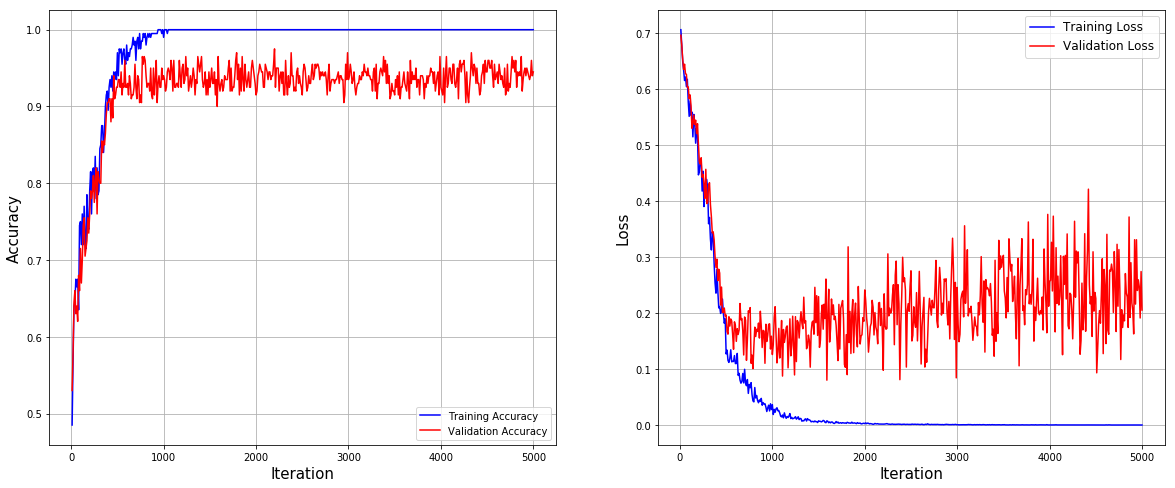

Best Model: GB_GN_-10dB_A2_2004080348_00790_loss_0.057905_val_loss_0.112126.pt


In [3]:
CT = CNN_Training(GB_X, GB_Y, n_ch = 2, n_cls = 2, lr = 0.00001, n_batch_per_cls = 100, n_iter = 5000, model_name = 'GB_GN_-10dB_A2', GPU_idx = 3)

CT.Run(model_dir = './model/', hist_dir = './results/0_train_hist/npy/')